**Importing Libraries**

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
df= pd.read_csv('diabetes.csv')

In [70]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Data Cleaning**

In [72]:
##missing values
df[df.isnull().any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


**Data Visualization**

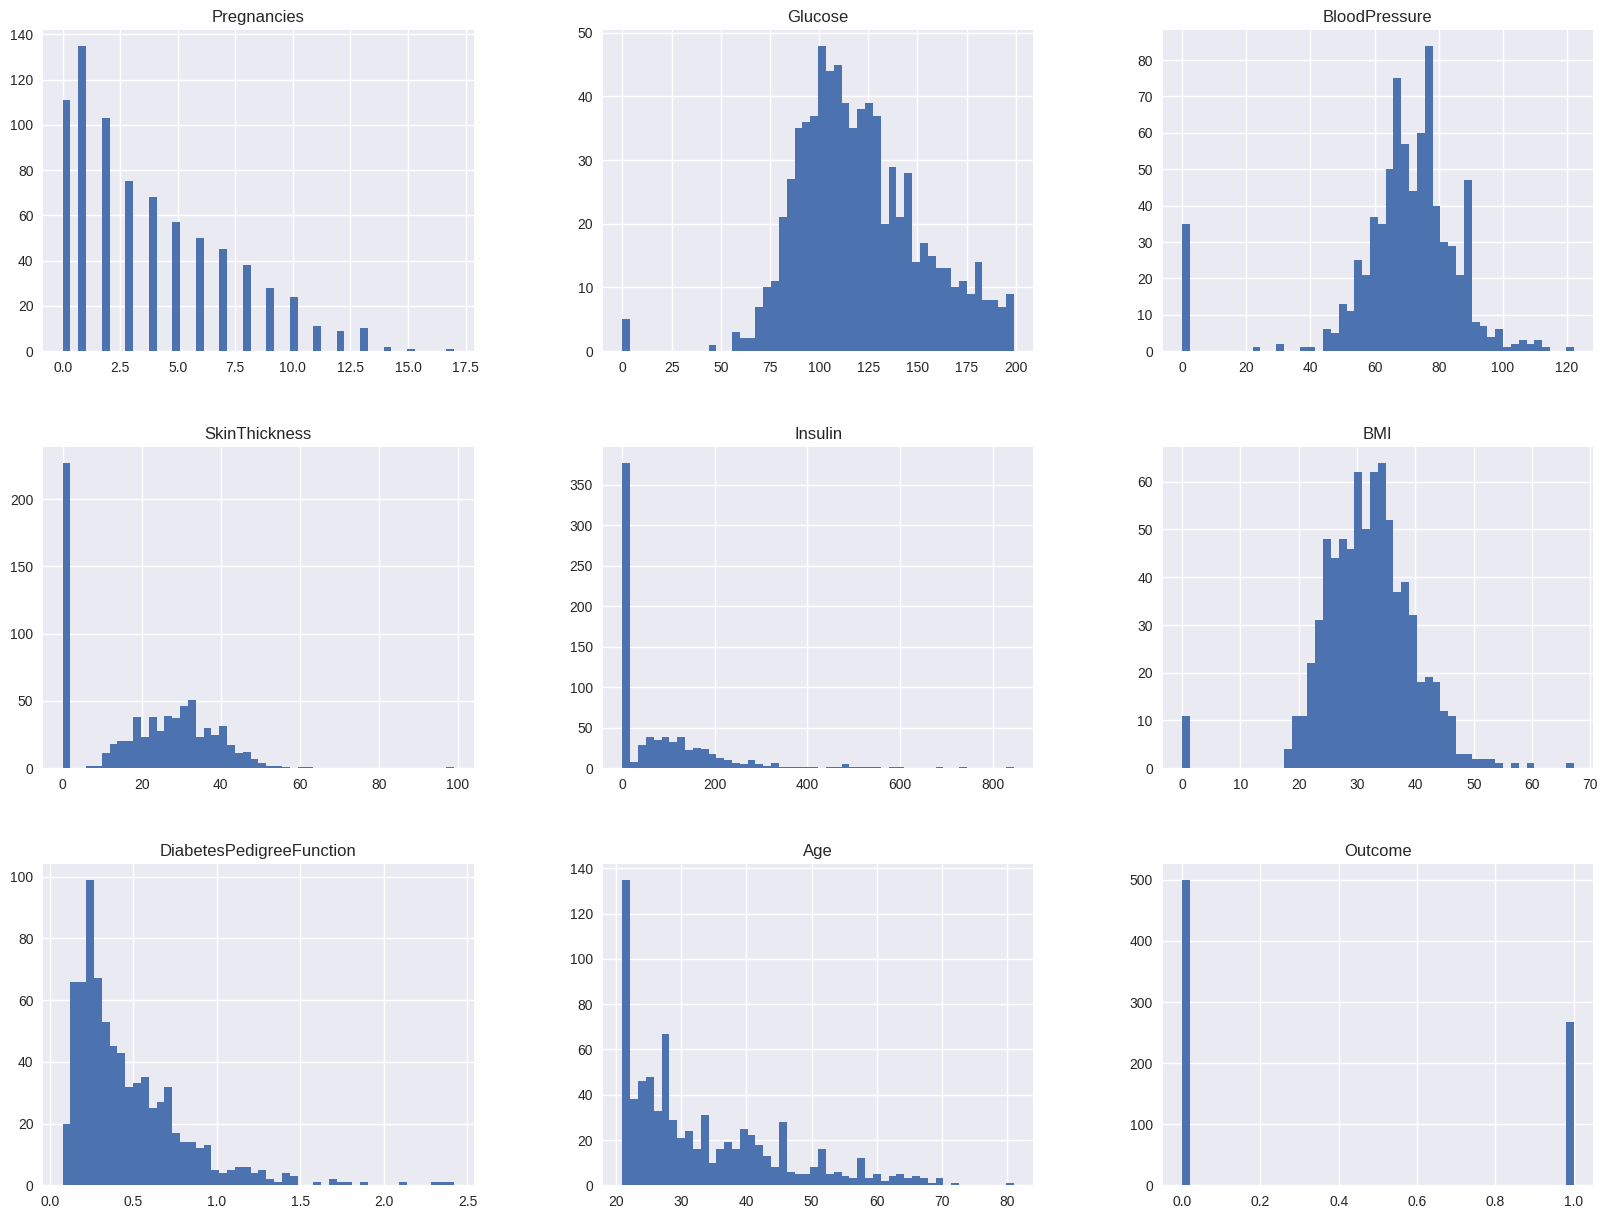

In [73]:
## Plot density plot for all features
plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15))
plt.show()

**Independent and dependent features**

In [74]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [75]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [76]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

**Train Test Split**

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.20,random_state =42)

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
treeclassifier=DecisionTreeClassifier()

In [80]:
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [81]:
from sklearn import tree
plt.figure(figsize=(100,100))
tree.plot_tree(treeclassifier,filled=True)

[Text(0.45808649289099523, 0.9615384615384616, 'x[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.16380331753554503, 0.8846153846153846, 'x[7] <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.05924170616113744, 0.8076923076923077, 'x[5] <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(0.018957345971563982, 0.7307692307692307, 'x[6] <= 0.672\ngini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(0.009478672985781991, 0.6538461538461539, 'gini = 0.0\nsamples = 108\nvalue = [108, 0]'),
 Text(0.02843601895734597, 0.6538461538461539, 'x[6] <= 0.686\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.018957345971563982, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.037914691943127965, 0.5769230769230769, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.0995260663507109, 0.7307692307692307, 'x[2] <= 37.0\ngini = 0.275\nsamples = 97\nvalue = [81, 16]'),
 Text(0.09004739336492891, 0.6538461538461539, 

In [82]:
## Post Pruning with max_depth =2
treeclassifier=DecisionTreeClassifier(criterion='entropy',max_depth=2)
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[1] <= 127.5\nentropy = 0.931\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.5, 'x[7] <= 28.5\nentropy = 0.712\nsamples = 390\nvalue = [314, 76]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.391\nsamples = 221\nvalue = [204, 17]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.933\nsamples = 169\nvalue = [110, 59]'),
 Text(0.75, 0.5, 'x[5] <= 29.95\nentropy = 0.964\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.895\nsamples = 61\nvalue = [42, 19]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.85\nsamples = 163\nvalue = [45, 118]')]

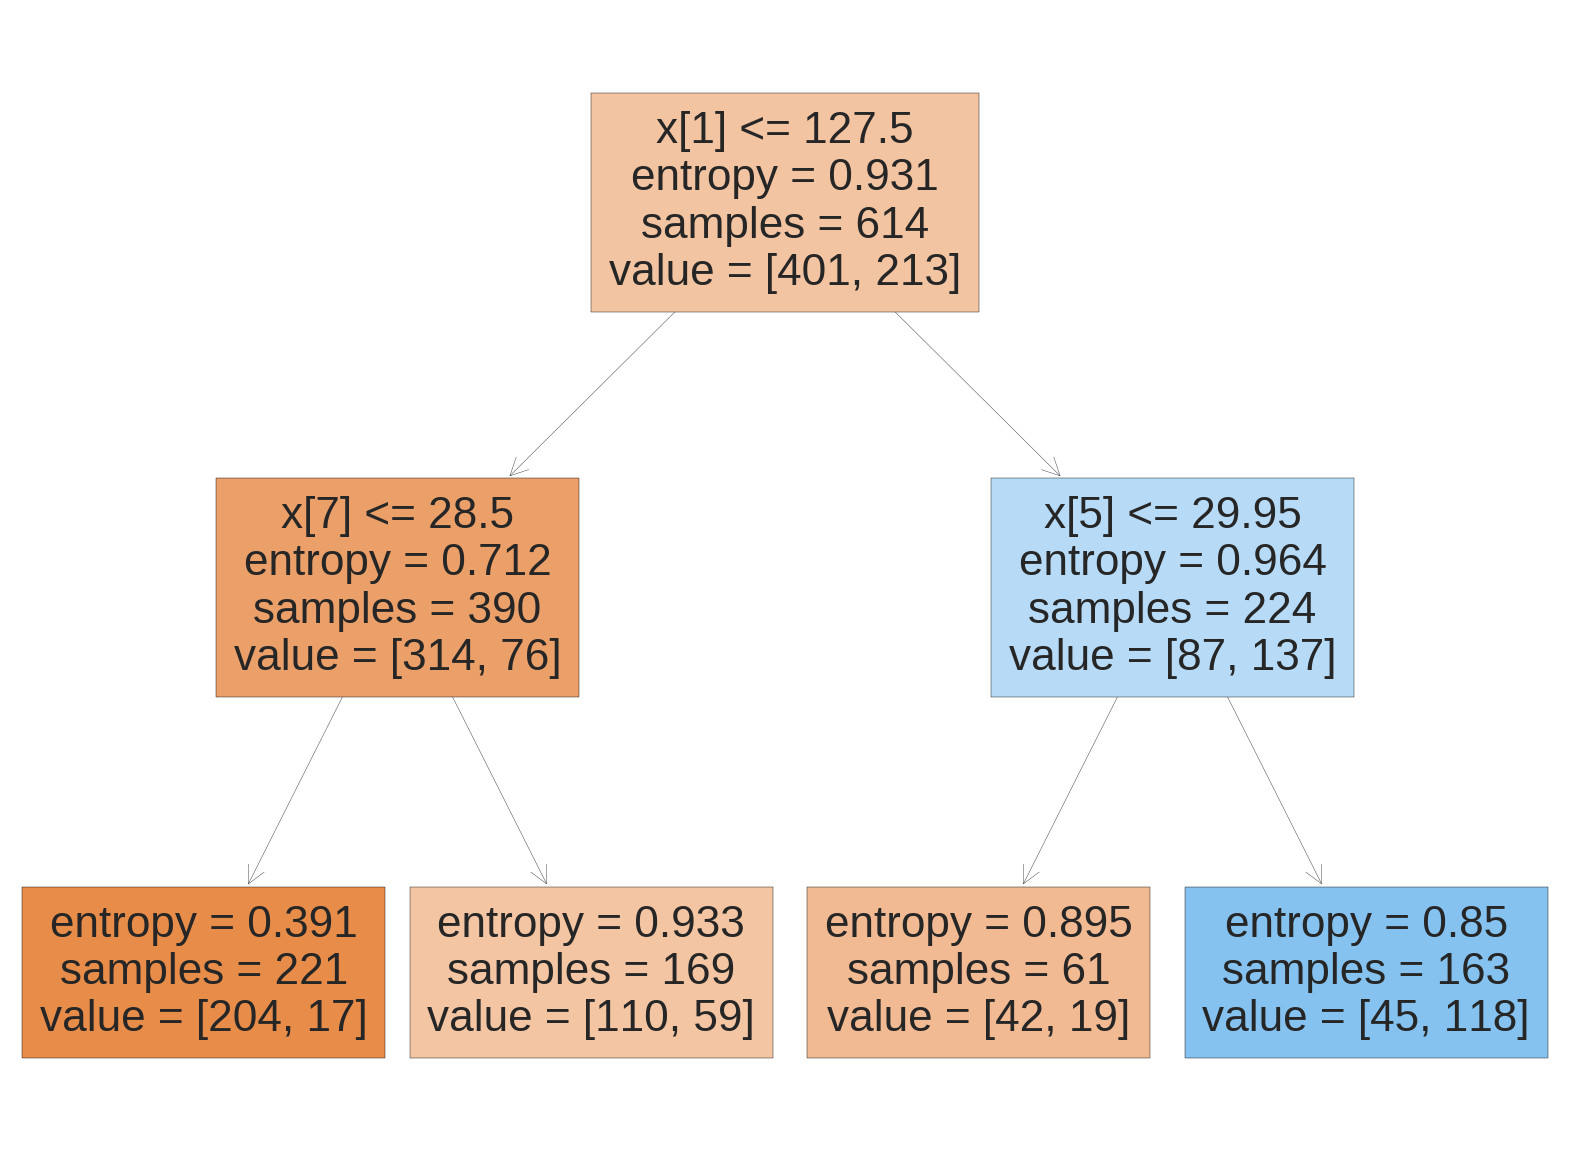

In [83]:
from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(treeclassifier,filled=True)


**Prediction**

In [84]:
y_pred=treeclassifier.predict(X_test)

In [85]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [86]:
from sklearn.metrics import accuracy_score,classification_report


In [87]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.7727272727272727
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       110
           1       0.58      0.73      0.65        44

    accuracy                           0.77       154
   macro avg       0.73      0.76      0.74       154
weighted avg       0.79      0.77      0.78       154



**Using Cross Validation**

In [88]:
parameter={
    'criterion': ['gini','entropy','log_loss'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']

}

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
treeclassifier = DecisionTreeClassifier()
clf=GridSearchCV(treeclassifier,param_grid=parameter,cv=5,scoring='accuracy')

In [91]:
import warnings
warnings.filterwarnings('ignore')

In [92]:
#train
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [93]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'auto',
 'splitter': 'best'}

In [94]:
y_pred=clf.predict(X_test)

In [95]:
print(accuracy_score(y_pred,y_test))

0.7337662337662337


In [96]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       108
           1       0.55      0.65      0.59        46

    accuracy                           0.73       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.75      0.73      0.74       154

